 # Solving the Hypothesis Testing problems

### Importing the Necessary libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm, t
from math import sqrt

### Creating a t_score function for sampling distribution 

In [92]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sqrt(sample_size)
    return numerator / denomenator

### Let's Understand the Hypothesis Testing

##### To implement the hypothesis testing we need to follow some steps to get requried hypothesis value

#### Step 1:
##### We need to select the Hypothesis by observing the given condition in the task  wheather to accept the null hypothesis or not
##### Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ \gt, \ \lt, \ \neq  $
##### Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

#### Step 2:
##### Collecting the Sample size and mean from this sample
* Collect the Sample Size  of  N 

* Collect the Mean from this Sample $\bar{x} $

#### Step 3:
##### Compute the test Statistic based on the data
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

#### Step 4:
#### In this step we need to decide the significance level of  $ \alpha $.  lower $ \alpha $ in order to get strong evidence for rejecting the Null Hypothesis.

#### Step 5.1:
#####  Apply the Decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
#### Step 5.2:  Compute the value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

###  Calculating the given hypothesis problem by without the Variance of Population 

#### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

### Calculating the Sample Mean

In [93]:
l = [490,220,470,500,495,496,496,498,508,480]
sum(l)/len(l)

465.3

### Calculating the T-critical value using the two tailed test 

In [94]:
# implementing the two tailed test method for calculating the t_critical 

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


### Calculating the sample standard deviation 

In [95]:
sample_std = np.std(l)
sample_std

82.3918078451978

### Defining the Sample and population parameters 

In [96]:
sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = 82.39

### Calculating the t_score

In [97]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t)

-1.3318489477830164


### Let's visualize the sample distribution rejection regions by ploting graphs

Text(465.3, 0.0007, 'x_bar')

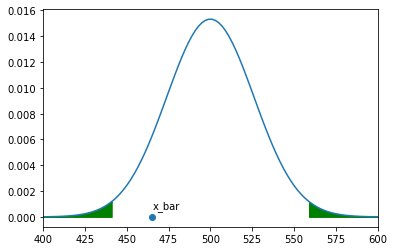

In [98]:
# Defining the x minimum and x maximum
x_min = 400
x_max = 600

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sqrt(sample_size)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='green')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

### Concluding the results by using the T-test 

In [99]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


#### After looking the above t-test results we can say that we are failing to reject the Null Hypothesis  by performing the t-test 

### Let's conclude hypothesis results by using the p-value

In [100]:
# Conclusion using p value

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.18290982980044457
Fail to reject Null Hypothesis


#### After performing p-value it is showing that still it is fail to reject the Null hypothesis by performing p-test

#### Q-2  <b>You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 20 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if ? $$

Step - 5.2: Compute p-value

### Calculating the Sample Mean

In [101]:
l = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
sum(l)/len(l)

4.25

### Calculating the t critical value using one tail test

In [102]:
## Implementing the one tail method for calculating the t_critical 

from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [103]:
sample_std = np.std(l)
sample_std

0.82915619758885

### Defining the sample and population parameters

In [104]:
sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = 0.82 

### Calculating the t-score 

In [105]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

1.3634560838413352


###  Let's visualize the sample distribution rejection regions by ploting graphs

Text(4.25, 0.1, 'x_bar')

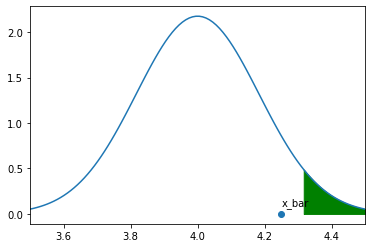

In [106]:
# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sqrt(sample_size)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')


# Ploting the sample mean and concluding the results 

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

### Now we need to conclude the results by using the t-test

In [107]:
# Conclusion using z test

if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


### Now we are testing the hypothesis results by using p-test 

In [108]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.08636940802398319
Fail to reject Null Hypothesis


#### Q - 3  TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 20 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

### Calculating the sample mean

In [109]:
l = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sum(l)/len(l)

15.098999999999998

In [110]:
sample_std = np.std(l)
sample_std

0.9994043225842081

### Performing the one tail test to calculate the t- critical value

In [111]:
## Implementing the one tail method for calculating the t_critical 

from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


### Taking the sample distribution from the  mean sample

In [112]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
sample_std = 0.99

In [113]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

0.4517309045454104


### Visualizing the sample rejection regions by plotting the graphs

Text(15.1, 0.1, 'x_bar')

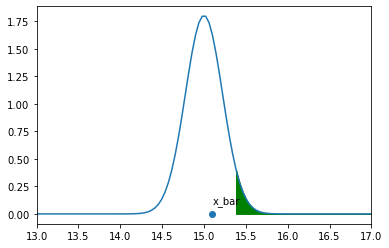

In [114]:
x_min = 13
x_max = 17

mean = pop_mean
std = sample_std / sqrt(sample_size)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
#plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [115]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [116]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.3257314258118913
Fail to reject Null Hypothesis


#### Q-4  <b>You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 100   
* Compute sample mean $$ \bar{x} \ = \ 97.5 $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

### Applying the One-tail test to calculate the t_critical value

In [117]:
## implementing the one tail test to calculate the t_critical value

from scipy.stats import t

alpha = 1 - 0.99

t_critical = t.ppf(1 - alpha, df=19)

print(t_critical)

2.5394831906222883


### Calculating the  sample distribution by taking the mean sample

In [118]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
sample_std = 8

In [119]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-3.125


Text(97.5, 0.02, 'x_bar')

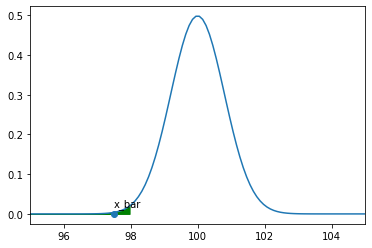

In [120]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / sqrt(sample_size)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

### performing the t-test to check the final  results 

In [121]:
if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


### Implementing the p-value method to check the final results 

In [122]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0008890252991083925
Reject Null Hypothesis
